This is part of hair-segment project, where you cann find its source in [hair-segment repo](https://github.com/hadilq/hair-segment).

In [1]:
!nvidia-smi

Fri May 31 23:18:52 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.116.04   Driver Version: 525.116.04   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P5000        Off  | 00000000:00:05.0 Off |                  Off |
| 26%   31C    P8     6W / 180W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics
!pip uninstall -y tensorboard wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 25.2 MB/s eta 0:00:00
Found existing installation: tensorboard 2.15.1
Uninstalling tensorboard-2.15.1:
  Successfully uninstalled tensorboard-2.15.1
Found existing installation: wandb 0.15.10
Uninstalling wandb-0.15.10:
  Successfully uninstalled wandb-0.15.10


In [3]:
import os
import glob
from ultralytics import YOLO
from IPython import display
display.clear_output()
!yolo mode=check
root_path = os.path.abspath('./')

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are {'benchmark', 'track', 'export', 'predict', 'train', 'val'}.

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'pose', 'classify', 'detect', 'obb'}
                MODE (required) is one of {'benchmark', 'track', 'export', 'predict', 'train', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detectio

# Prepare dataset

In [ ]:
# if you are running it in Google colab, otherwise run below cell.
from google.colab import userdata
secdata = {
    'hair-seg-token': userdata.get('hair-seg-token'),
    'hair-ltyav-token': userdata.get('hair-ltyav-token')
}

In [5]:
# if you are running in paperspace.com, just fill 
secdata = {
    'hair-seg-token': 'change-it',
    'hair-ltyav-token': 'change-it'
}

In [6]:
!rm -rf {root_path}/hair-seg
!mkdir -p {root_path}/hair-seg
os.chdir(root_path + '/hair-seg')
hair_seg_url = "https://universe.roboflow.com/ds/" + secdata['hair-seg-token']
!curl -L {hair_seg_url} > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   3036      0 --:--:-- --:--:-- --:--:--  3040
100  100M  100  100M    0     0  42.4M      0  0:00:02  0:00:02 --:--:-- 68.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/1millidollars-W1tm2v7I0E0-unsplash_jpg.rf.34cc49a9e6038d5090223dbed5485703.jpg  
 extracting: test/images/alberto-barbarisi-sO3WT9XJOhE-unsplash_jpg.rf.c1ef68fac385df46e179f94c4e7a43cc.jpg  
 extracting: test/images/ali-pli-HmqYb9P-IJ8-unsplash_jpg.rf.c7cc9af782f69135779b034eadb7e0a8.jpg  
 extracting: test/images/arrn-capture-9F-SubDyDWw-unsplash_jpg.rf.b60b30e348432e8470a38d87082d9757.jpg  
 extracting: test/images/ave-calvar-yUA6xGvWFWE-unsplash_jpg.rf.ae4e34d86255450c9

In [7]:
!rm -rf {root_path}/hair-ltyav
!mkdir -p {root_path}/hair-ltyav
os.chdir(root_path + '/hair-ltyav')
hair_ltyav_url = "https://universe.roboflow.com/ds/" + secdata['hair-ltyav-token']
!curl -L {hair_ltyav_url} > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2626      0 --:--:-- --:--:-- --:--:--  2632
100 18.4M  100 18.4M    0     0  19.7M      0 --:--:-- --:--:-- --:--:-- 32.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/00233-3887184641_png.rf.ca4e4d4ecc95781eb91be558dd027419.jpg  
 extracting: test/images/00242-3887184650_png.rf.46bf36f2fb6bfbca8045b1165bf5c561.jpg  
 extracting: test/images/00249-3887184657_png.rf.9505d544745c20fc2ae76ef984a981bb.jpg  
 extracting: test/images/00401-3887184809_png.rf.4bbaafc91483c0e2bcf2782544f73e39.jpg  
 extracting: test/images/00408-3887184816_png.rf.0b6c70e6df642038fef080d72b4be358.jpg  
 extracting: test/images/00438-3887184846_png.rf.b278eca591cff

In [8]:
!rm -rf {root_path}/dataset
!mkdir -p {root_path}/dataset
os.chdir(root_path + '/dataset')
!mv {root_path}/hair-ltyav/train {root_path}/dataset
!mv {root_path}/hair-ltyav/valid {root_path}/dataset
!mv {root_path}/hair-ltyav/test {root_path}/dataset
!mv {root_path}/hair-seg/train/images/* {root_path}/dataset/train/images/
!mv {root_path}/hair-seg/train/labels/* {root_path}/dataset/train/labels/
!mv {root_path}/hair-seg/valid/images/* {root_path}/dataset/valid/images/
!mv {root_path}/hair-seg/valid/labels/* {root_path}/dataset/valid/labels/
!mv {root_path}/hair-seg/test/images/* {root_path}/dataset/test/images/
!mv {root_path}/hair-seg/test/labels/* {root_path}/dataset/test/labels/
!mv {root_path}/hair-seg/data.yaml {root_path}/dataset/

# Training Yolo model

In [9]:
os.chdir(root_path)
!rm -rf {root_path}/runs
!yolo task=segment mode=train model=yolov8x-seg.pt data={root_path}/dataset/data.yaml epochs=20 imgsz=640 deterministic=True seed=34854 batch=4

100%|█████████████████████████████████████████| 137M/137M [00:00<00:00, 239MB/s]
Ultralytics YOLOv8.2.26 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (Quadro P6000, 24443MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/notebooks/hair-segment/dataset/data.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=34854, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

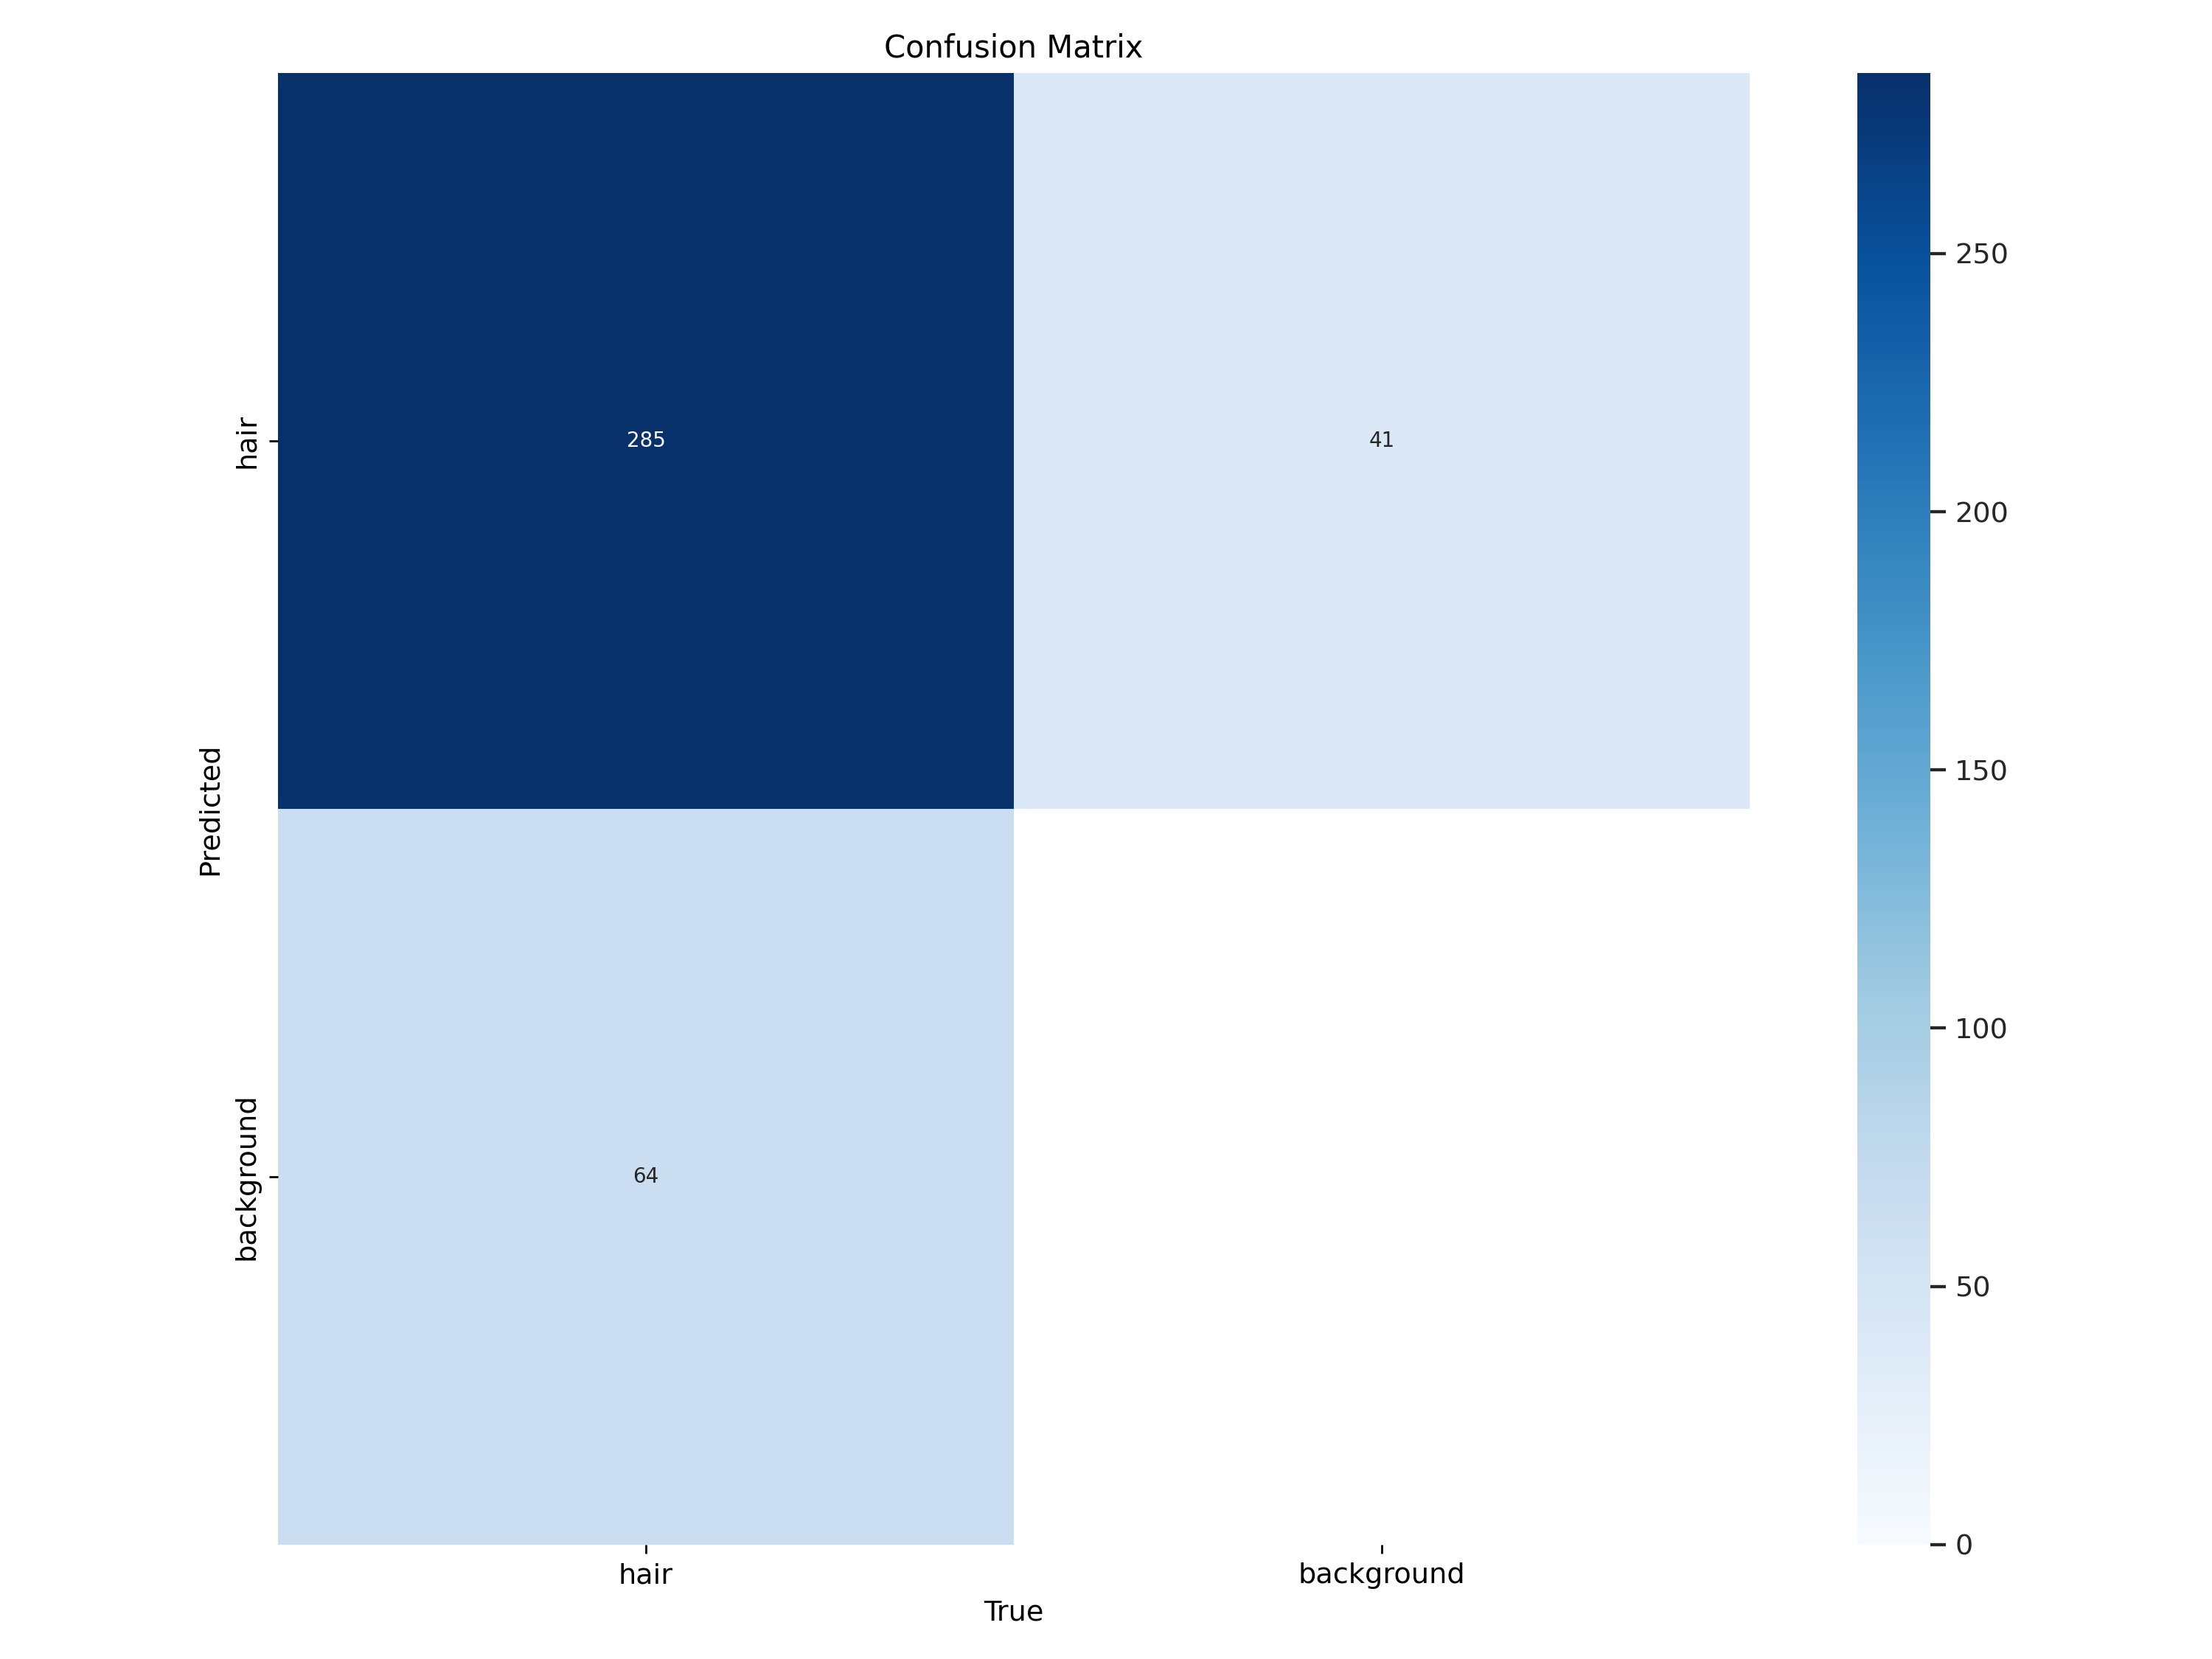

In [10]:
from IPython.display import display, Image
Image(filename = root_path + f'/runs/segment/train/confusion_matrix.png', width=1000)

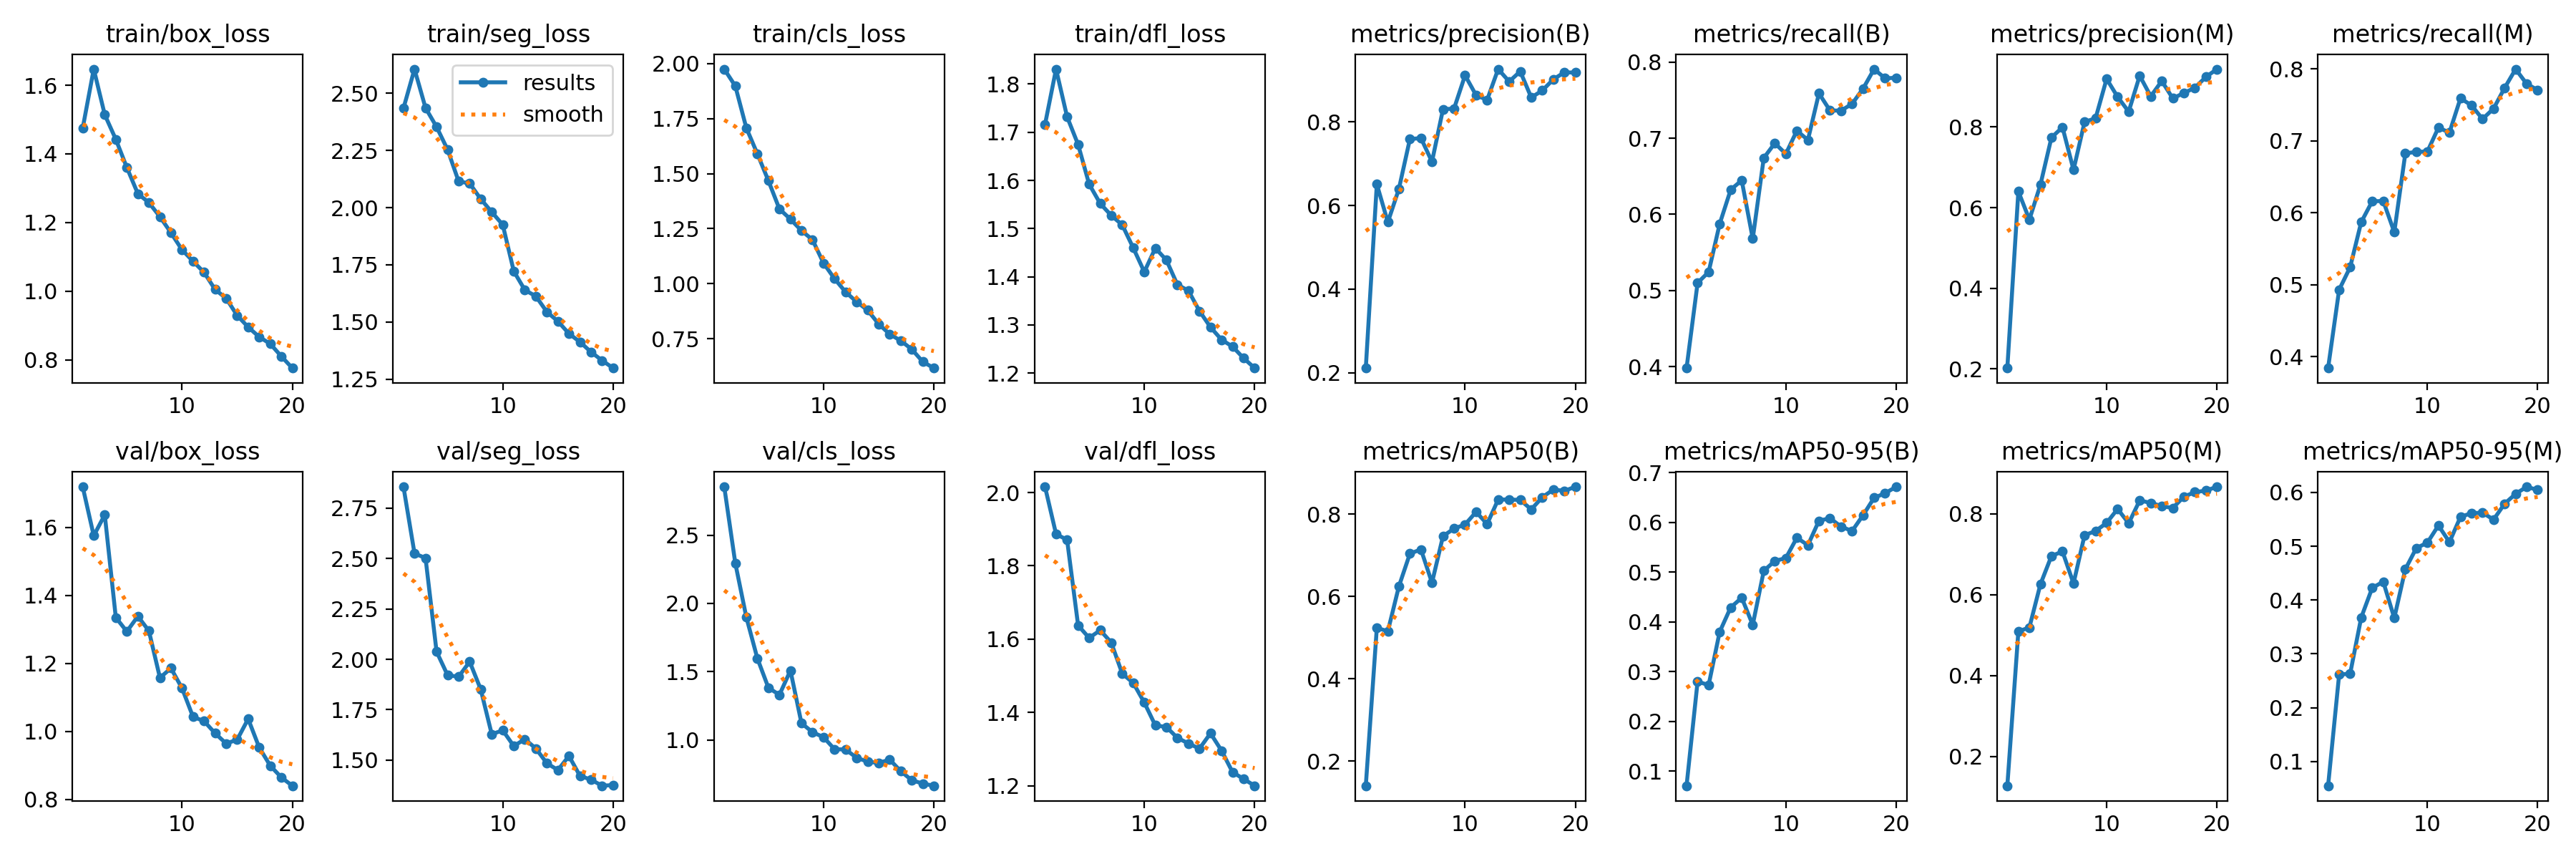

In [11]:
Image(filename = root_path + f'/runs/segment/train/results.png', width=1000)

In [12]:
!yolo task=segment mode=val model={root_path}/runs/segment/train/weights/best.pt data={root_path}/dataset/data.yaml

Ultralytics YOLOv8.2.26 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (Quadro P6000, 24443MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /notebooks/hair-segment/dataset/valid/labels.cache... 254 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        254        349      0.917      0.779      0.865       0.67      0.945      0.771      0.868      0.603
Speed: 1.6ms preprocess, 34.0ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=segment mode=predict model={root_path}/runs/segment/train/weights/best.pt conf=0.5 source={root_path}/dataset/test/images/*.jpg imgsz=640

Ultralytics YOLOv8.2.26 🚀 Python-3.11.7 torch-2.1.1+cu121 CUDA:0 (Quadro P6000, 24443MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

image 1/134 /notebooks/hair-segment/dataset/test/images/00233-3887184641_png.rf.ca4e4d4ecc95781eb91be558dd027419.jpg: 640x640 1 hair, 39.4ms
image 2/134 /notebooks/hair-segment/dataset/test/images/00242-3887184650_png.rf.46bf36f2fb6bfbca8045b1165bf5c561.jpg: 640x640 2 hairs, 39.8ms
image 3/134 /notebooks/hair-segment/dataset/test/images/00249-3887184657_png.rf.9505d544745c20fc2ae76ef984a981bb.jpg: 640x640 1 hair, 39.2ms
image 4/134 /notebooks/hair-segment/dataset/test/images/00401-3887184809_png.rf.4bbaafc91483c0e2bcf2782544f73e39.jpg: 640x640 2 hairs, 37.5ms
image 5/134 /notebooks/hair-segment/dataset/test/images/00408-3887184816_png.rf.0b6c70e6df642038fef080d72b4be358.jpg: 640x640 1 hair, 38.7ms
image 6/134 /notebooks/hair-segment/dataset/test/images/00438-3887184846_png.rf.b278eca591cffcc9ede2a56c18686441.j

In [ ]:
from IPython.display import display, Image
for image_path in glob.glob(root_path + f'/runs/segment/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print('\n')

In [6]:
!cp {root_path}/runs/segment/train/weights/best.pt {root_path}/best.pt
!cp {root_path}/best.pt {root_path}/replicate/

# Prepare drive to copy dataset over there

In [ ]:
# If you need to save it in google drive, otherwise run below cell
from google.colab import drive
drive_path = root_path + '/drive'
drive.mount(drive_path)
!cp best-8.pt {root_path}/drive/MyDrive

In [4]:
# If you want to save it without mounting google drive
!mkdir -p {root_path}/drive

In [5]:
# run this only the first time. Google drive has a weird behaviour if you try it again!
!mkdir -p {root_path}/drive/MyDrive/hair-colorization/dataset/train/labels
!mkdir -p {root_path}/drive/MyDrive/hair-colorization/dataset/valid/labels
!mkdir -p {root_path}/drive/MyDrive/hair-colorization/dataset/test/labels

In [9]:
# Do this first time loading `mod` in this kernel, otherwise, run only below cell
import importlib
mod = importlib.import_module("replicate.hair_segment_predictor")

In [ ]:
# Run this one if this is the second time you are loading the `mod`
importlib.reload(mod)

In [14]:
from PIL import Image as Img
from IPython.display import display, Image
!rm -rf {root_path}/final-predict
!mkdir -p {root_path}/final-predict
for image_path in glob.glob(root_path + f'/dataset/test/images/*.jpg'):
  img, b_mask = hair_segment_predictor.find_mask(image_path)
  for x in range(len(b_mask)):
    for y in range(len(b_mask[0])):
      if b_mask[x][y] == 255:
        img[x][y] = [255,255,255]

  image_result_path = image_path.replace('/dataset/test/images', '/final-predict')
  Img.fromarray(img).save(image_result_path)
  display(Image(filename=image_path, height=600))
  display(Image(filename=image_result_path, height=600))
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [10]:
mod.make_hsv_dataset(root_path + f'/dataset/test/images/', root_path + f'/drive/MyDrive/hair-colorization/dataset/test/labels')

image_path: /notebooks/hair-segment/dataset/test/images/pexels-lanyjade-mondou-13231586_jpg.rf.02e961b38faab64e953effa25bc7b592.jpg
data_output_path: /notebooks/hair-segment/drive/MyDrive/hair-colorization/dataset/test/labels/pexels-lanyjade-mondou-13231586_jpg.rf.02e961b38faab64e953effa25bc7b592.json

0: 640x640 2 hairs, 52.9ms
Speed: 5.7ms preprocess, 52.9ms inference, 748.0ms postprocess per image at shape (1, 3, 640, 640)
area: 33526
expand_factor: 76
vectorized_pixels len: 73585
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
K: 9
K: 10
K: 11
K: 12
K: 13
label_img shape: (640, 640)
count_hair_label: [3522, 2367, 3023, 1801, 1542, 4166, 2403, 1692, 1247, 2202, 4581, 2393, 2587]
count_not_hair_label: [243, 7015, 170, 796, 17083, 43, 82, 438, 12675, 256, 82, 1140, 36]
hairy_label: {0, 2, 3, 5, 6, 7, 9, 10, 11, 12}
sample shape: (28370,), sample type: uint8
data: {'min_hue': 0, 'max_hue': 177, 'mean_hue': 111, 'median_hue': 42}
image_path: /notebooks/hair-segment/dataset/test/images/pexels-gatot-adri-2

/notebooks/hair-segment/replicate/hair_segment_predictor.py:251: RuntimeWarning: overflow encountered in scalar add
  median_hue = np.uint8((sample_in_hue[middle] + sample_in_hue[middle + 1]) / 2)


K: 4
K: 5
label_img shape: (640, 640)
count_hair_label: [2840, 293, 1827, 812, 3]
count_not_hair_label: [335, 4119, 479, 1097, 402]
hairy_label: {0, 2}
sample shape: (4667,), sample type: uint8
data: {'min_hue': 0, 'max_hue': 179, 'mean_hue': 100, 'median_hue': 130}
image_path: /notebooks/hair-segment/dataset/test/images/00601-3887185009_png.rf.0c31823d6c881c29f9ed1f5ef78b0ace.jpg
data_output_path: /notebooks/hair-segment/drive/MyDrive/hair-colorization/dataset/test/labels/00601-3887185009_png.rf.0c31823d6c881c29f9ed1f5ef78b0ace.json

0: 640x640 1 hair, 53.0ms
Speed: 1.7ms preprocess, 53.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
area: 9140
expand_factor: 40
vectorized_pixels len: 27113
K: 3
K: 4
label_img shape: (640, 640)
count_hair_label: [88, 5830, 557, 2665]
count_not_hair_label: [6003, 473, 8169, 3328]
hairy_label: {1}
sample shape: (5830,), sample type: uint8
data: {'min_hue': 16, 'max_hue': 25, 'mean_hue': 19, 'median_hue': 20}
image_path: /notebooks/h

KeyboardInterrupt: 

Testing if the generated JSON files are parcelable

In [ ]:
mod.test_if_all_files_are_parcelable(root_path + f'/drive/MyDrive/hair-colorization/dataset/test/labels')

# And finally Manual Testing
If you want to try the hair segmentation yourself, upload your input.jpg file, then run below code.

In [ ]:
img_input = root_path + '/input.jpg'
img_output = root_path + '/output.jpg'
img = mod.predict(img_input)

Img.fromarray(img).save(img_output)
display(Image(filename=img_input, height=600))
display(Image(filename=img_output, height=600))